In [2]:
# !pip install -q threadpoolctl==3.1.0

In [18]:
import pandas as pd
data_dir = './data/'
X = pd.read_csv(data_dir+'features.csv')
X.set_index('Unnamed: 0', inplace=True)
display(X.shape)
y = pd.read_csv(data_dir+'labels.csv', index_col=False)
y.set_index('Unnamed: 0', inplace=True)
display(y.shape)

(139, 20501)

(139, 1)

In [19]:
import pickle
import numpy as np
geneset_dict = pickle.load(open(data_dir + 'hallmarks_of_cancer_geneset_dictionary.pkl','rb'))
all_hallmark_genes = np.unique(np.concatenate([v for k,v in geneset_dict.items()]))
len(all_hallmark_genes)

4384

In [20]:
X_sub = X.loc[:,np.intersect1d(X.columns.values,all_hallmark_genes)]
display(X_sub.shape)
X_sub.head()

(139, 4223)

,A2M,AAAS,AADAT,AARS,ABAT,ABCA1,ABCA2,ABCA3,ABCA4,ABCA5,...,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRD1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
tcga-2y-a9gt-2,19515,773,479,3542,12577,3133,2186,70,25,2316,...,1,412,141,1564,260,0,0,399,287,3220
tcga-2y-a9gv-4,8756,828,616,6088,23069,2885,1129,110,39,2132,...,2,347,124,1320,339,0,0,642,100,2903
tcga-2y-a9gw-5,43813,622,49,4758,7663,1649,2252,96,58,1284,...,6,431,646,935,361,0,0,351,221,8467
tcga-2y-a9gy-7,11699,1179,81,2991,966,1559,935,22,28,641,...,2,371,264,709,584,0,0,318,735,3825
tcga-2y-a9gz-8,264407,919,1435,3304,21557,1762,2134,107,42,2779,...,2,514,156,874,285,0,0,648,259,1394


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sub)

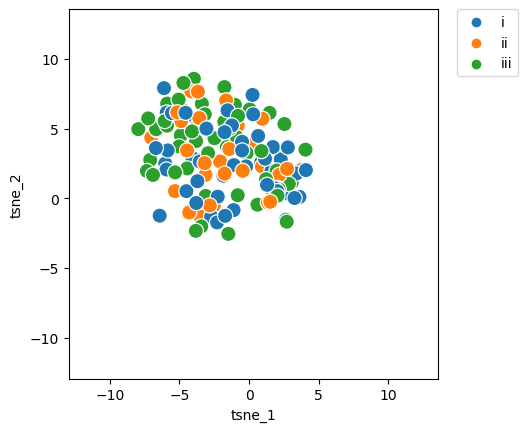

In [22]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# We want to get TSNE embedding with 2 dimensions
n_components = 2
tsne = TSNE(n_components)
tsne_result = tsne.fit_transform(X_scaled)
tsne_result.shape

# # Plot the result of our TSNE with the label color coded
# # A lot of the stuff here is about making the plot look pretty and not TSNE
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y.to_numpy().reshape(-1)})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=120)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

In [25]:
from sklearn.model_selection import train_test_split
# test train split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, shuffle=True, random_state=42)

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

/Users/christinaxu/opt/anaconda3/envs/ml23/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [27]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.39285714285714285


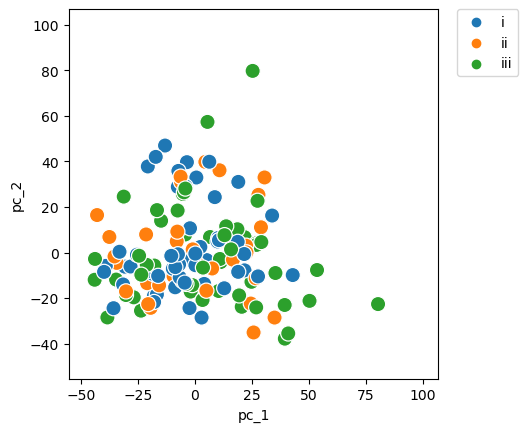

In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.95)
reduced = pca.fit_transform(X_scaled)
reduced.shape
reduced_df = pd.DataFrame({'pc_1': reduced[:,0], 'pc_2': reduced[:,1], 'label': y.to_numpy().reshape(-1)})
fig, ax = plt.subplots(1)
sns.scatterplot(x='pc_1', y='pc_2', hue='label', data=reduced_df, ax=ax,s=120)
lim = (reduced.min()-5, reduced.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)


In [44]:
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(reduced, y_encoded, test_size=0.20, shuffle=True, random_state=42)

In [41]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_encoded = le.fit_transform(y)

/Users/christinaxu/opt/anaconda3/envs/ml23/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [45]:
knn.fit(X_train_reduced, y_train)
y_pred_reduced = knn.predict(X_test_reduced)
accuracy = accuracy_score(y_test, y_pred_reduced)
print("Accuracy:", accuracy)

Accuracy: 0.32142857142857145


In [28]:
from sklearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, shuffle=True, random_state=42)
pipe = Pipeline(steps=[('scaler', StandardScaler()), ('classifier', KNeighborsClassifier(n_neighbors=3))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

/Users/christinaxu/opt/anaconda3/envs/ml23/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.39285714285714285

In [33]:
from sklearn.preprocessing import MinMaxScaler, Normalizer, MaxAbsScaler
from sklearn.model_selection import GridSearchCV

parameters = {'scaler': [StandardScaler(), MinMaxScaler(), Normalizer(), MaxAbsScaler()],
              'classifier__n_neighbors': [1, 3, 5, 7, 10],
              'classifier__p': [1, 2],
              'classifier__leaf_size': [1, 5, 10, 15]
            }



grid = GridSearchCV(pipe, parameters, cv=2).fit(X_train_reduced, y_train)

/Users/christinaxu/opt/anaconda3/envs/ml23/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/christinaxu/opt/anaconda3/envs/ml23/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/christinaxu/opt/anaconda3/envs/ml23/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/christinaxu/opt/anaconda3/envs/ml23/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: Data

In [34]:
print('Training set score: ' + str(grid.score(X_train_reduced, y_train)))
print('Test set score: ' + str(grid.score(X_test_reduced, y_test)))

Training set score: 0.6486486486486487
Test set score: 0.42857142857142855


In [31]:
# Access the best set of parameters
best_params = grid.best_params_
print(best_params)
# Stores the optimum model in best_pipe
best_pipe = grid.best_estimator_
print(best_pipe)

{'classifier__leaf_size': 1, 'classifier__n_neighbors': 5, 'classifier__p': 1, 'scaler': StandardScaler()}
Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', KNeighborsClassifier(leaf_size=1, p=1))])


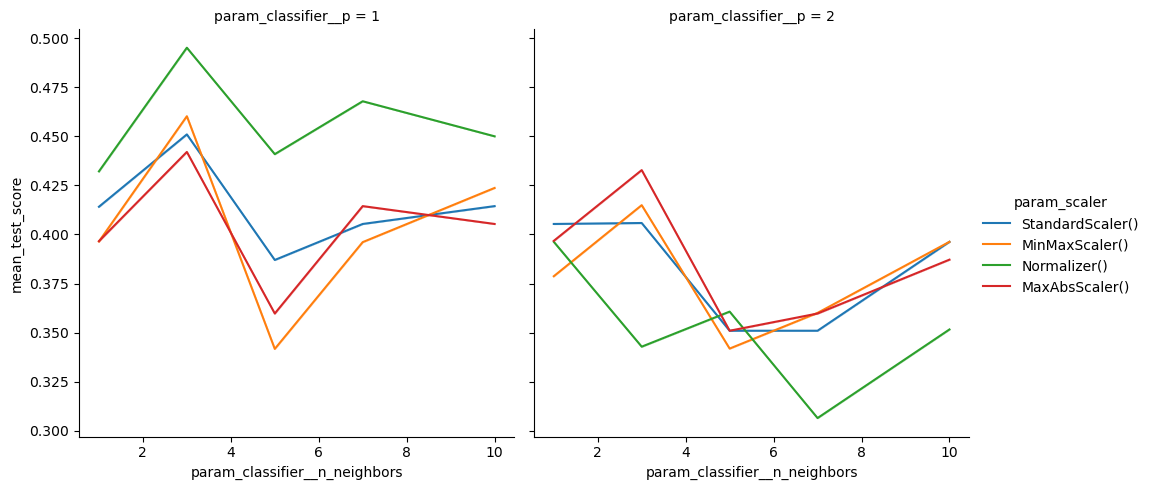

In [ ]:
result_df = pd.DataFrame.from_dict(grid.cv_results_, orient='columns')

sns.relplot(data=result_df,
 kind='line',
 x='param_classifier__n_neighbors',
 y='mean_test_score',
 hue='param_scaler',
 col='param_classifier__p')
plt.show()
``

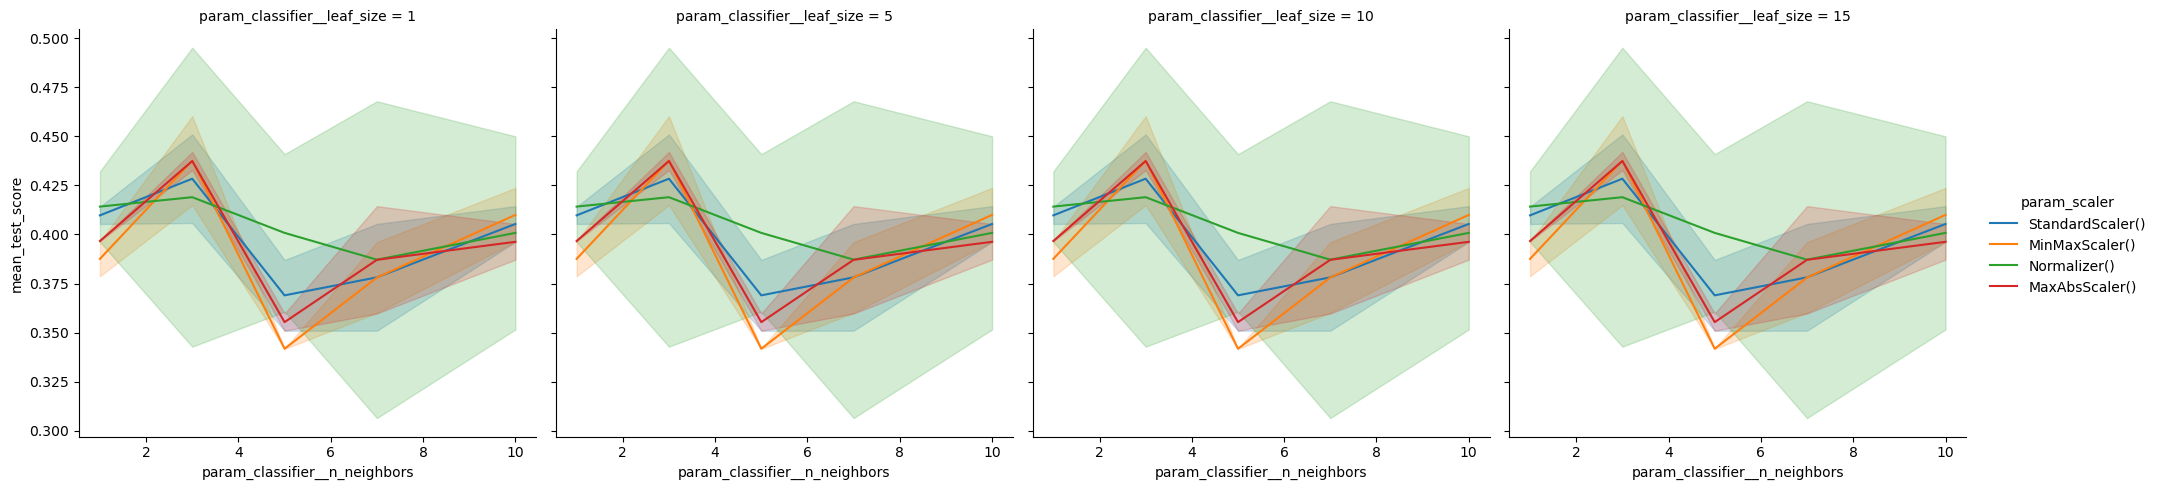

In [ ]:
sns.relplot(data=result_df,
            kind='line',
            x='param_classifier__n_neighbors',
            y='mean_test_score',
            hue='param_scaler',
            col='param_classifier__leaf_size')
plt.show()


In [35]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

grid_predictions = grid.predict(X_test_reduced)

cm = confusion_matrix(y_test, grid_predictions)
display(cm)

print(classification_report(y_test, grid_predictions))

array([[4, 1, 2],
       [3, 0, 2],
       [7, 1, 8]])

              precision    recall  f1-score   support

           i       0.29      0.57      0.38         7
          ii       0.00      0.00      0.00         5
         iii       0.67      0.50      0.57        16

    accuracy                           0.43        28
   macro avg       0.32      0.36      0.32        28
weighted avg       0.45      0.43      0.42        28



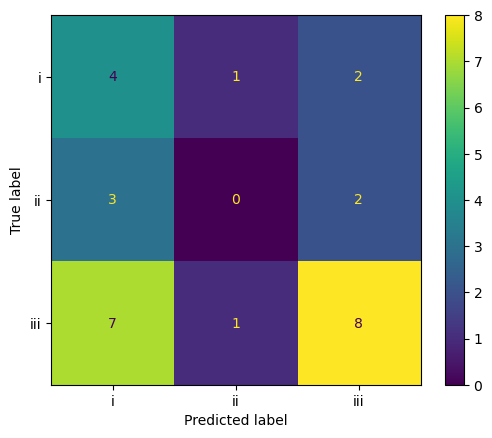

In [37]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['i', 'ii', 'iii'])

cm_display.plot()
plt.show()

In [40]:
y_test.shape

(28, 1)